In [2]:
import numpy as np
import tensorflow as tf
import keras
from keras.datasets.fashion_mnist import load_data
from keras.layers import Dense,Dropout,Activation,Add,MaxPooling2D,Conv2D,Flatten,BatchNormalization,MaxPool2D
from keras.models import Sequential
from keras.preprocessing import image
import matplotlib.pyplot as plt


Label : 2
Shape : (28, 28, 1)


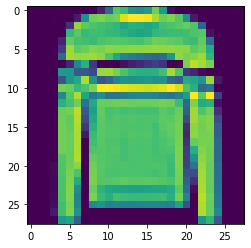

In [16]:
#Getting MNIST data
(training_images, training_labels), (test_images, test_labels) = load_data()
training_images, test_images = training_images / 255.0, test_images / 255.0
training_images=training_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)
plt.imshow(training_images[5])
print("Label : {}".format(training_labels[5]))
print("Shape : {}".format(training_images[5].shape))


In [17]:
#Creating model
model = Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [18]:
#Model compilation
model.compile(optimizer='Adam', metrics=['accuracy'], loss='sparse_categorical_crossentropy')
call = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True)


In [19]:
#Training the model
fit = model.fit(training_images,training_labels,validation_data=(test_images,test_labels),epochs=10,callbacks=[call])

Epoch 1/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.3685 - accuracy: 0.8676 - val_loss: 0.3041 - val_accuracy: 0.8888
Epoch 2/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.2481 - accuracy: 0.9093 - val_loss: 0.2824 - val_accuracy: 0.8986
Epoch 3/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.2022 - accuracy: 0.9261 - val_loss: 0.2614 - val_accuracy: 0.9057
Epoch 4/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.1663 - accuracy: 0.9384 - val_loss: 0.2574 - val_accuracy: 0.9118
Epoch 5/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.1365 - accuracy: 0.9491 - val_loss: 0.2498 - val_accuracy: 0.9150
Epoch 6/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.1133 - accuracy: 0.9577 - val_loss: 0.2732 - val_accuracy: 0.9150
Epoch 7/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0903 - accuracy: 0.9661 - val_loss: 0.2774 -

In [20]:
#Data for plots
acc = fit.history['accuracy']
val_acc = fit.history['val_accuracy']
loss = fit.history['loss']
val_loss = fit.history['val_loss']
epochs = range(1, len(loss) + 1)

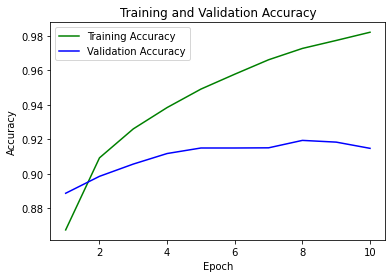

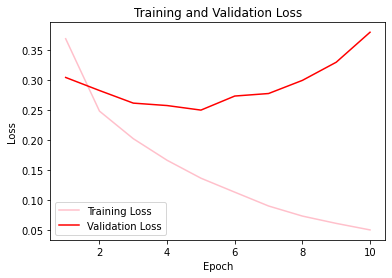

<Figure size 432x288 with 0 Axes>

In [21]:
#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.figure()
plt.show()

In [22]:
#Saving model
model.save('mnistModel')

INFO:tensorflow:Assets written to: mnistModel\assets
